In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [23]:
listingsNYC_with_nulls = pd.read_csv('listings.csv', dtype=object)
listingsNYC_with_nulls

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.8038,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50,NaN
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41528,771962449581256963,Romántico y natural,421601513,Juan Carlos,Manhattan,Washington Heights,40.84727072881559,-73.94341916084775,Private room,80,5,0,NaN,NaN,3,358,0,NaN
41529,771967712456918474,Sunset Park Studio Sublet,326495,Laura Adriana,Brooklyn,Sunset Park,40.63832893587064,-74.01671019409663,Entire home/apt,42,30,0,NaN,NaN,3,89,0,NaN
41530,771971759808918693,9B5B Townhouse w/ Elevator & Private Entrance,316920152,Allison,Manhattan,Murray Hill,40.74690169639175,-73.97826030246593,Entire home/apt,3888,2,0,NaN,NaN,8,365,0,NaN
41531,771971822371481471,Huge 9B5B Townhouse w Elevator & Private Entr...,484979380,Natasha,Manhattan,Murray Hill,40.74959584319043,-73.98079769535242,Entire home/apt,3888,2,0,NaN,NaN,2,364,0,NaN


In [24]:
# Dropping all of the columns which we will not use
listingsNYC= listingsNYC_with_nulls.drop(['last_review','license','latitude','longitude','host_name'], axis=1)

# Dropping all rows with any 'Nan' values in them
listingsNYC.dropna(axis=0, how='any', inplace=True)
listingsNYC

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,21,3,0.03,1,267,1
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,0.73,1,0,0
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,2,322,0
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,559,3.38,1,79,50
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,175,30,49,0.31,3,365,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,769580756557673403,Cozy 1 bedroom with 2 full beds ROOM #2,162927656,Queens,Jamaica,Shared room,99,1,1,1,7,174,1
41160,769612968972941927,Comfortable 1 bedroom ROOM #3,162927656,Queens,Jamaica,Shared room,91,1,1,1,7,174,1
41175,770593748958588679,Luxury Brooklyn apt. | 10 mins away from JFK,489532090,Brooklyn,East New York,Entire home/apt,145,1,2,2,1,351,2
41218,769850569510129629,Private Bed Manhattan 20 Mins,324722741,Queens,Woodside,Private room,50,1,1,1,1,240,1


In [25]:
# checking all of the dtypes of the columns
print('Datatypes before \n')
print(listingsNYC.dtypes)
print('\n')

#defining all of the data column types
data_types_dict = {
    'price':'int64', 
    'minimum_nights':'int64', 
    'host_id':str,
    'number_of_reviews':'int64',
    'reviews_per_month':float,
    'calculated_host_listings_count':'int64',
    'availability_365':'int64',
    'number_of_reviews_ltm':'int64'}

#changing all the datatype to their respective types that we can work with
listingsNYC = listingsNYC.astype(data_types_dict)
#checking to see that the dtypes were changed
print('Datatypes after \n')
print(listingsNYC.dtypes)

Datatypes before 

id                                object
name                              object
host_id                           object
neighbourhood_group               object
neighbourhood                     object
room_type                         object
price                             object
minimum_nights                    object
number_of_reviews                 object
reviews_per_month                 object
calculated_host_listings_count    object
availability_365                  object
number_of_reviews_ltm             object
dtype: object


Datatypes after 

id                                 object
name                               object
host_id                            object
neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 fl

In [26]:
# creating a price per stay (ppn) column with the price and minimim nights columns and rounding to 2 decimal places. 
# This is a float dtype 
listingsNYC['pps'] = (listingsNYC['price'] * listingsNYC['minimum_nights']).round(2)
listingsNYC

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,21,3,0.03,1,267,1,5775
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,0.73,1,0,0,150
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,2,322,0,1800
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,559,3.38,1,79,50,136
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,175,30,49,0.31,3,365,1,5250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,769580756557673403,Cozy 1 bedroom with 2 full beds ROOM #2,162927656,Queens,Jamaica,Shared room,99,1,1,1.00,7,174,1,99
41160,769612968972941927,Comfortable 1 bedroom ROOM #3,162927656,Queens,Jamaica,Shared room,91,1,1,1.00,7,174,1,91
41175,770593748958588679,Luxury Brooklyn apt. | 10 mins away from JFK,489532090,Brooklyn,East New York,Entire home/apt,145,1,2,2.00,1,351,2,145
41218,769850569510129629,Private Bed Manhattan 20 Mins,324722741,Queens,Woodside,Private room,50,1,1,1.00,1,240,1,50


In [27]:
# check for outliers 
describe_df = listingsNYC.describe()
describe_df

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps
count,32134.000000,32134.000000,32134.000000,32134.000000,32134.000000,32134.000000,32134.000000,3.213400e+04
mean,196.275223,16.139354,33.867866,1.279502,10.636958,142.513506,10.318883,2.685699e+03
std,831.541622,28.483042,61.803678,1.935213,38.325794,141.416457,20.526149,1.573199e+04
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000e+00
25%,80.000000,2.000000,3.000000,0.140000,1.000000,0.000000,0.000000,2.980000e+02
50%,130.000000,5.000000,10.000000,0.580000,1.000000,89.000000,2.000000,1.028000e+03
75%,208.000000,30.000000,36.000000,1.880000,3.000000,306.000000,13.000000,3.000000e+03
max,98159.000000,1250.000000,1666.000000,102.980000,487.000000,365.000000,992.000000,2.253600e+06


In [33]:
def get_outlier_bounds(col_name):
    '''
    Gets the bound for outliers in the dataset. This is to make the visualizations easier. This function is 
    specifically for this usage and dataset
     
    Param:
        col_name: the name of the column for which you want the bounds. Must be a numerical column
    Return:
        A tuple with the col_name, upper_bound and lower_bound
    '''
    iqr = describe_df.loc['75%',col_name] - describe_df.loc['25%',col_name]
    upper_bound = describe_df.loc['75%',col_name] + (1.5* iqr)
    lower_bound = describe_df.loc['25%',col_name] - (1.5*iqr)
    print(col_name)
    print('upper bound ' + upper_bound.astype(str))
    print('lower bound ' + lower_bound.astype(str))
    print('-'*50)
    return (col_name,lower_bound,upper_bound)

In [34]:
# filtering out the outliers
# We only want the numeric columns because the get_outlier_bounds won't work on strings
numeric_cols = listingsNYC.select_dtypes(include=np.number)
for column in numeric_cols.columns:
    listingsNYC = listingsNYC[(listingsNYC[column] < get_outlier_bounds(column)[2]) & (listingsNYC[column] > get_outlier_bounds(column)[1])]
listingsNYC

price
upper bound 400.0
lower bound -112.0
--------------------------------------------------
price
upper bound 400.0
lower bound -112.0
--------------------------------------------------
minimum_nights
upper bound 72.0
lower bound -40.0
--------------------------------------------------
minimum_nights
upper bound 72.0
lower bound -40.0
--------------------------------------------------
number_of_reviews
upper bound 85.5
lower bound -46.5
--------------------------------------------------
number_of_reviews
upper bound 85.5
lower bound -46.5
--------------------------------------------------
reviews_per_month
upper bound 4.489999999999999
lower bound -2.4699999999999993
--------------------------------------------------
reviews_per_month
upper bound 4.489999999999999
lower bound -2.4699999999999993
--------------------------------------------------
calculated_host_listings_count
upper bound 6.0
lower bound -2.0
--------------------------------------------------
calculated_host_listings_

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,21,3,0.03,1,267,1,5775
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,2,322,0,1800
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,175,30,49,0.31,3,365,1,5250
5,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Manhattan,East Harlem,Private room,65,30,1,0.16,2,300,1,1950
12,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Brooklyn,Williamsburg,Private room,95,7,13,0.09,2,24,4,665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41036,768899741442488288,this is studio apartment,488754388,Queens,Glendale,Entire home/apt,106,1,1,1.00,1,346,1,106
41056,768239303625460600,Apartment in Corona Queens,105692628,Queens,Jackson Heights,Entire home/apt,140,1,1,1.00,1,350,1,140
41066,769046532467871799,Entire 3 bedroom apt - Sunnyside,188096291,Queens,Sunnyside,Entire home/apt,130,1,1,1.00,1,355,1,130
41175,770593748958588679,Luxury Brooklyn apt. | 10 mins away from JFK,489532090,Brooklyn,East New York,Entire home/apt,145,1,2,2.00,1,351,2,145


Text(0.5, 1.0, 'Histogram of Price')

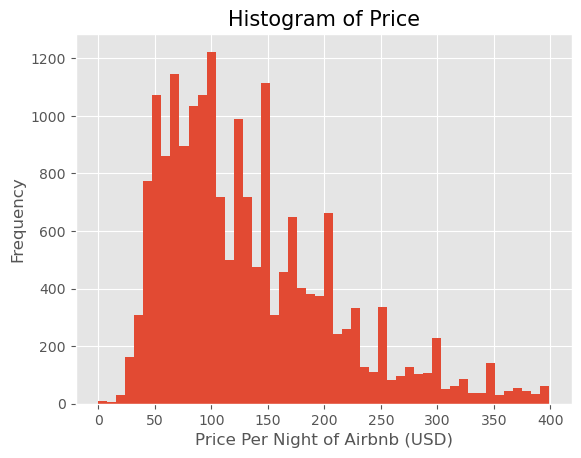

In [30]:
plt.hist((listingsNYC['price']), bins = 50)
plt.xlabel('Price Per Night of Airbnb (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Price', fontsize = 15)

<AxesSubplot:xlabel='price', ylabel='Density'>

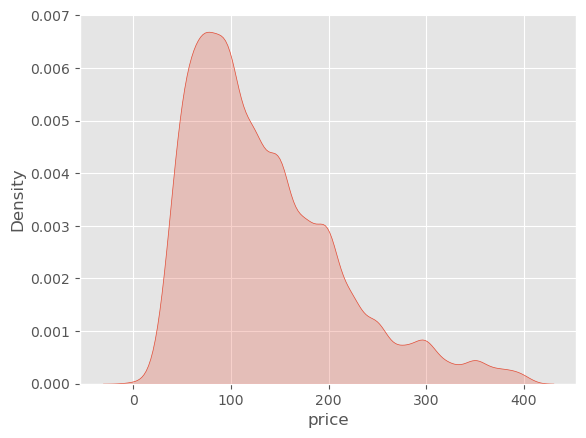

In [35]:
sns.kdeplot(listingsNYC['price'], shade = True, label = 'Estimated PDF of Log Price')